In [1]:
## This version excludes CONTINUOUS Variables and the RFD variables AND _wHICH VARIABLES 3/27/2024 and con_max_consultorder_time/day and drg name
## 4/4/2024 Added QUINTILE variables
## 4/8/2024 Added QUINTILE varables by service
## 4/9/2024 Added more consult and imaging variables (e.g. ad,it order to consult order, admit order to imaging read)
## 4/11/2024 Added QUINTILE variables by service for the additional variables
# 06/12/2024: Added gender, added imaging_order_before_consult_order and consult_order_before_imaging order variables, excluded 290 patients in 2022, dropped raw race/insurance categories
# 06/14/2024: Removed quintiles
# 06/20/2024: Set seed for reproducibility
# 06/22/2024: Added sample size for validation
# 07/05/2024: Collapsed Cardiology into Medicine
# 07/08/2024: Added labels
# 07/25/2024: Removed duplicated patients from master file
# 08/01/2024: Changed XGBoost hyperparmeter tuning to Haipeng's code and using only one model, streamlined so all shap plots in one jupyter notebook

In [2]:
import pandas as pd
import numpy as np
import os
import warnings
from los_functions import *
warnings.filterwarnings('ignore')

In [3]:
#all hospitalized patients 
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_all["viz_service_collapsed"] = df_all["viz_service_collapsed"].apply(map_med)

#discharged home
df_home = df_all[df_all["viz_disp_collapsed"] == "Home"].copy()

#hf patients
df_all = pd.read_csv('/gpfs/milgram/project/rtaylor/imc33/LOS/data/master_los.csv', index_col=[0])
df_hf = df_all[df_all["viz_drg"]=="heart failure & shock w mcc"].copy()

In [4]:
# Dictionary of data frames with their names
dfs = {
    "df_all": df_all,
    "df_home": df_home,
    "df_hf":df_hf
}

fp_simple = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los_simple.xlsx'
fp_complex = '/gpfs/milgram/project/rtaylor/imc33/LOS/data/features_los.xlsx'
output_folder = '/gpfs/milgram/project/rtaylor/imc33/LOS/output'

### Simple (without quintiles)

Running on df_all
df_filt shape: (12771, 907)
X train_preprocessed shape: (10246, 287)
X val preprocessed shape: (2525, 287)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 211)
X_val_selected shape: (2525, 211)
100%|██████████| 20/20 [00:15<00:00,  1.27trial/s, best loss: -0.7450523318985668]
XGB Best parameters for 211 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


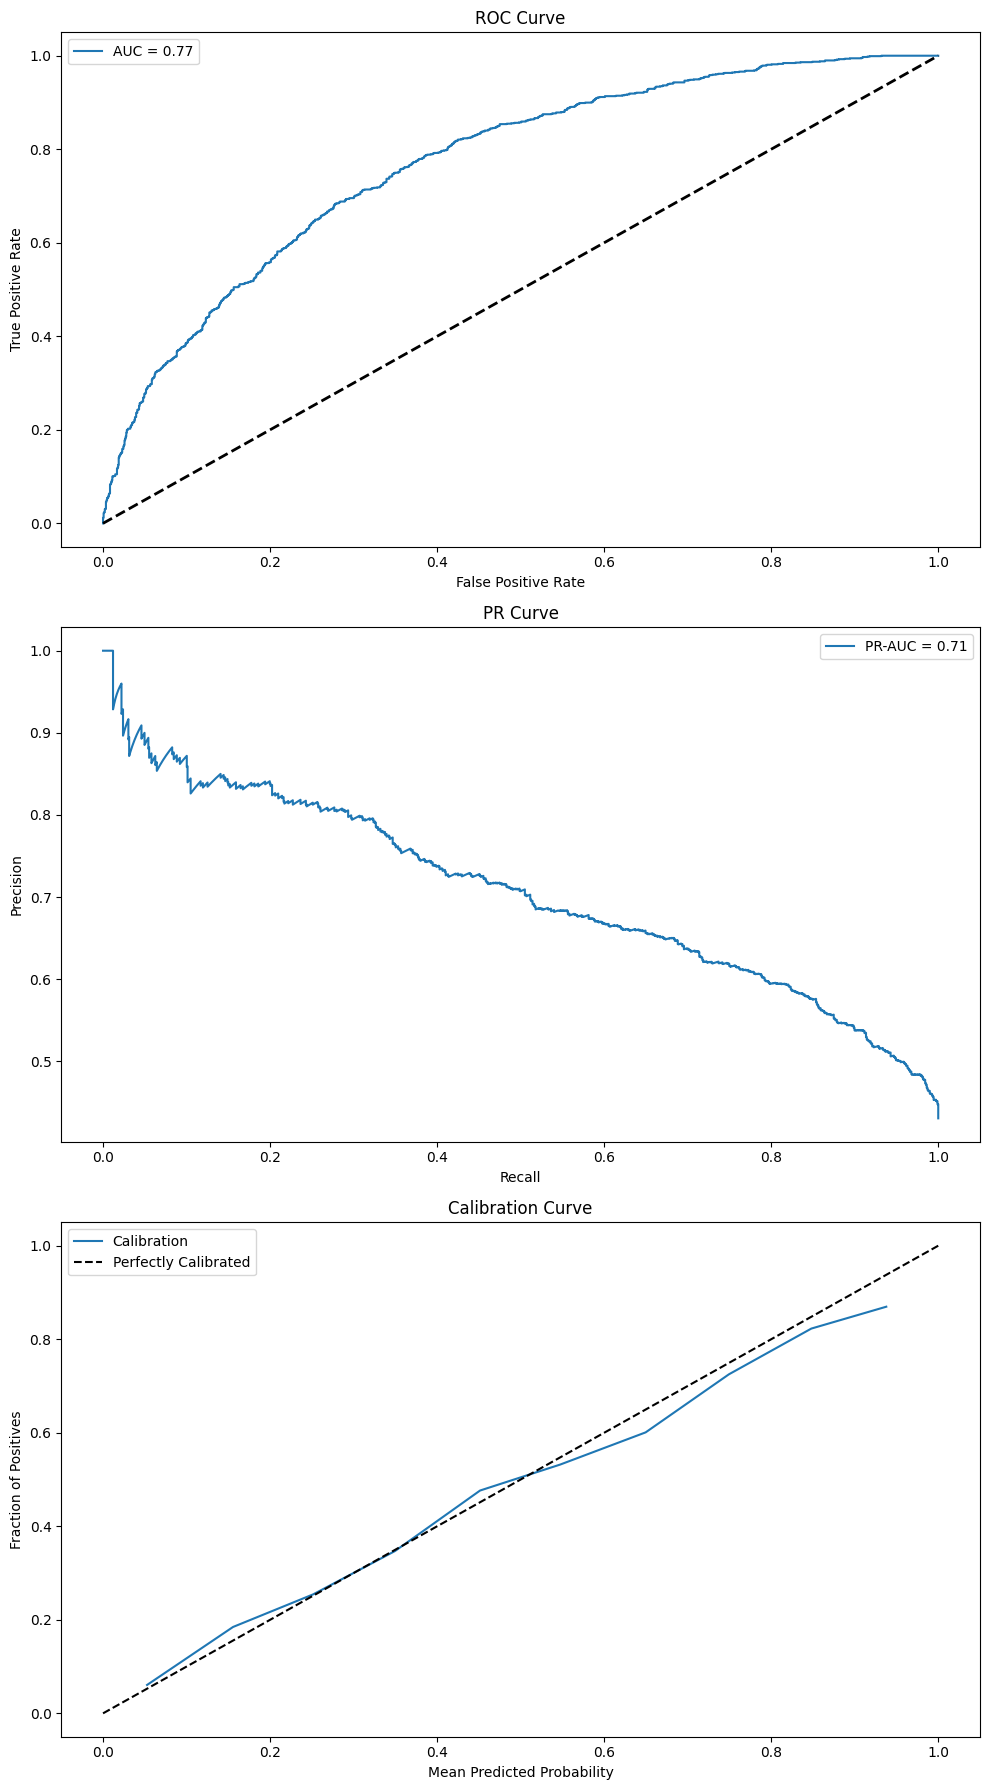

Specificity : 0.7677
Sensitivity : 0.6081
Accuracy : 0.6990
Precision : 0.6643
F1 score : 0.6350
Of 1438 people who did not have a prolonged LOS, 1104 (76.77%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 661 (60.81%) were correctly classified.
summary_consult_count_all
summary_first_rfd_status_No
img_count_any
viz_drg_Respiratory infections & inflammations w mcc
viz_disp_collapsed_Home
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
census_daily_ed_count
viz_service_collapsed_Surgical Services
thro_ed_arrival_time_Afternoon
summary_consult_count_unique_services
summary_last_rfd_status_No
viz_age
census_daily_inpt_count
img_count_us
con_service_gastroenterology_count
con_service_hospitalist_service_count
viz_ynhhs_sg2_service_Digestive Health - Medical
summary_last_edd_doc_time_Morning
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
summary_last_edd_doc_day_Mon
viz_admission_day_Fri
con_service_oncology_count
viz_insurance_Medicare
con

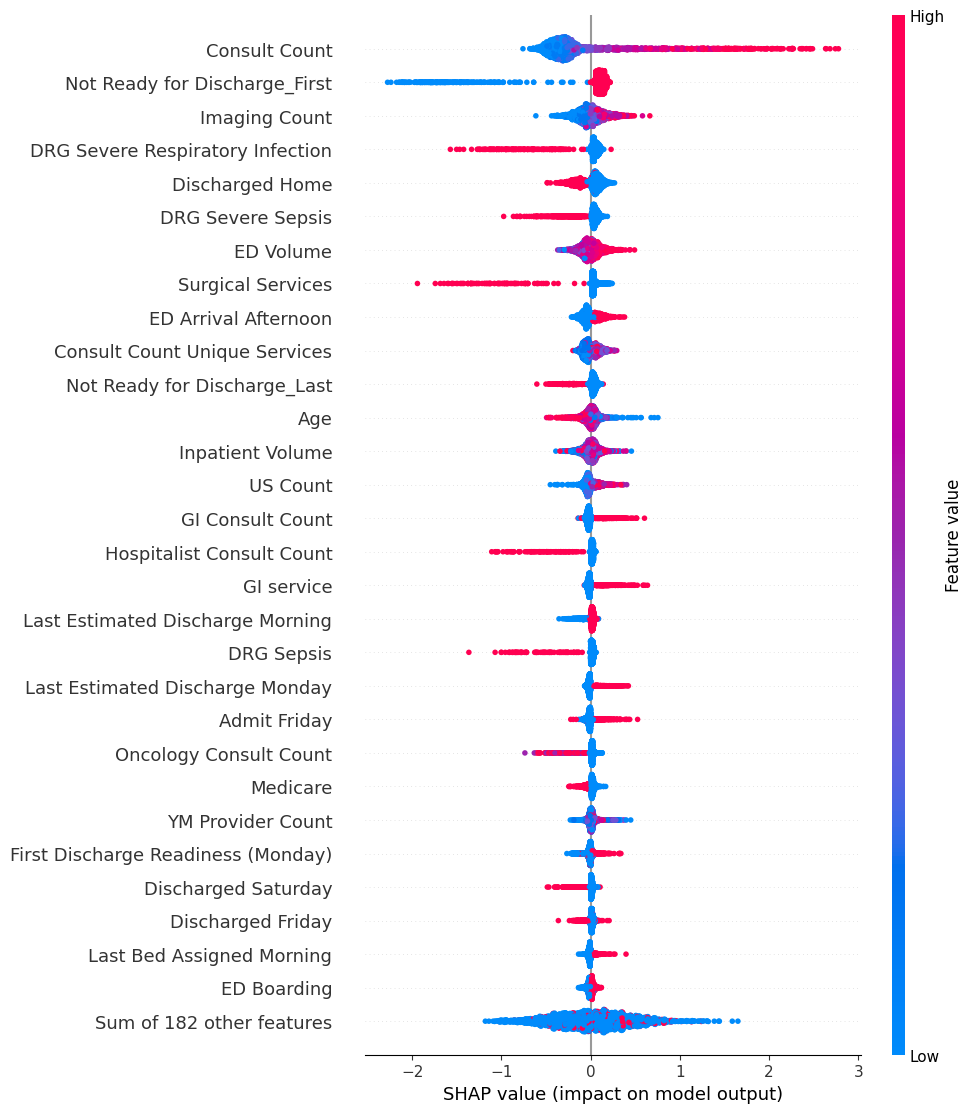

Plots for df_all_simple_2024-08-01 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_home
df_filt shape: (4749, 907)
X train_preprocessed shape: (3814, 283)
X val preprocessed shape: (935, 283)
y train prolonged LOS proportion: 0.3618248557944415
y val prolonged LOS proportion: 0.32192513368983955
X_train_selected shape: (3814, 205)
X_val_selected shape: (935, 205)
100%|██████████| 20/20 [00:09<00:00,  2.04trial/s, best loss: -0.7841394599174162]
XGB Best parameters for 205 features: {'colsample_by_tree': 0.6565004189886763, 'learning_rate': 0.29938202228220967, 'max_depth': 7, 'n_estimators': 33, 'num_leaves': 47, 'reg_lambda': 0.5464002904734102}


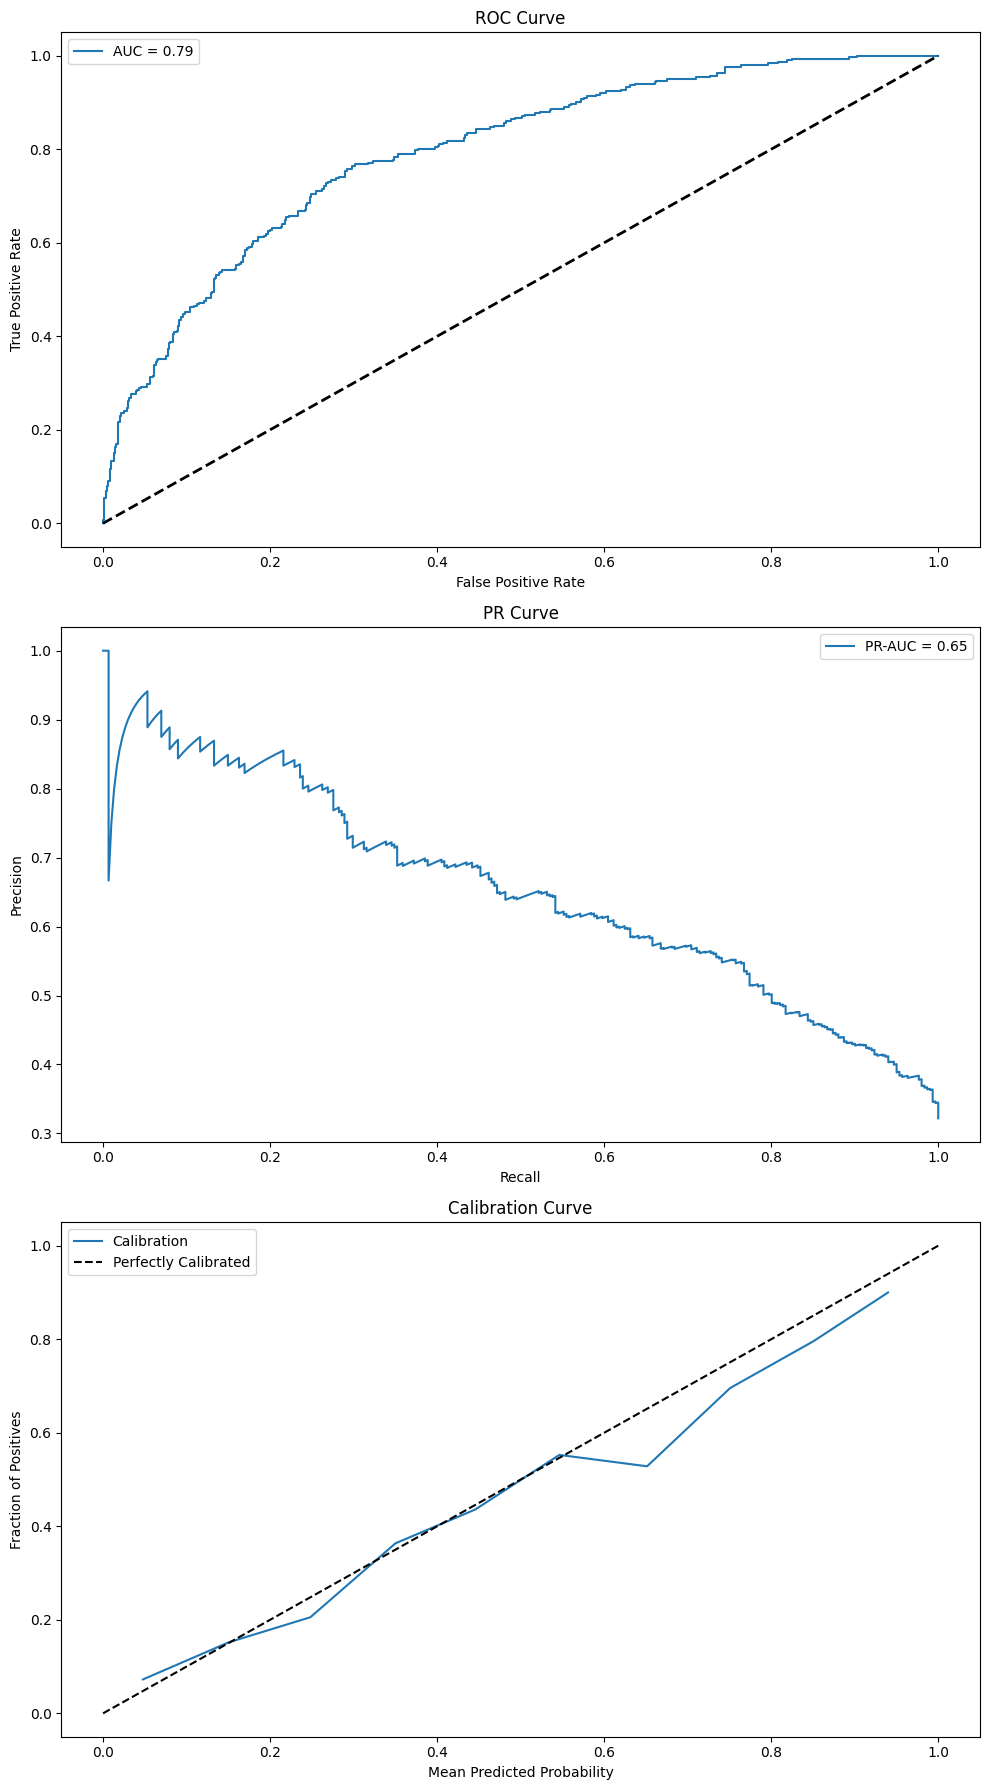

Specificity : 0.8675
Sensitivity : 0.5150
Accuracy : 0.7540
Precision : 0.6485
F1 score : 0.5741
Of 634 people who did not have a prolonged LOS, 550 (86.75%) were correctly classified.
Of 301 people who did have a prolonged LOS, 155 (51.50%) were correctly classified.
summary_first_rfd_status_No
summary_consult_count_all
viz_age
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
thro_ed_arrival_time_Afternoon
img_count_any
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
census_daily_ed_count
census_daily_inpt_count
viz_admission_day_Fri
img_count_us
summary_first_edd_doc_day_Thu
summary_first_rfd_day_Mon
summary_last_rfd_status_No
con_service_radiology_count
viz_ynhhs_sg2_service_Digestive Health - Medical
viz_drg_Respiratory infections & inflammations w mcc
viz_discharged_day_Sun
summary_last_edd_doc_day_Mon
summary_last_edd_doc_day_Thu
viz_drg_Rare
viz_discharged_day_Fri
summary_last_edd_doc_time_Morning
thro_ed_arrival_time_Night
summary_first_edd_doc_day_Mon
su

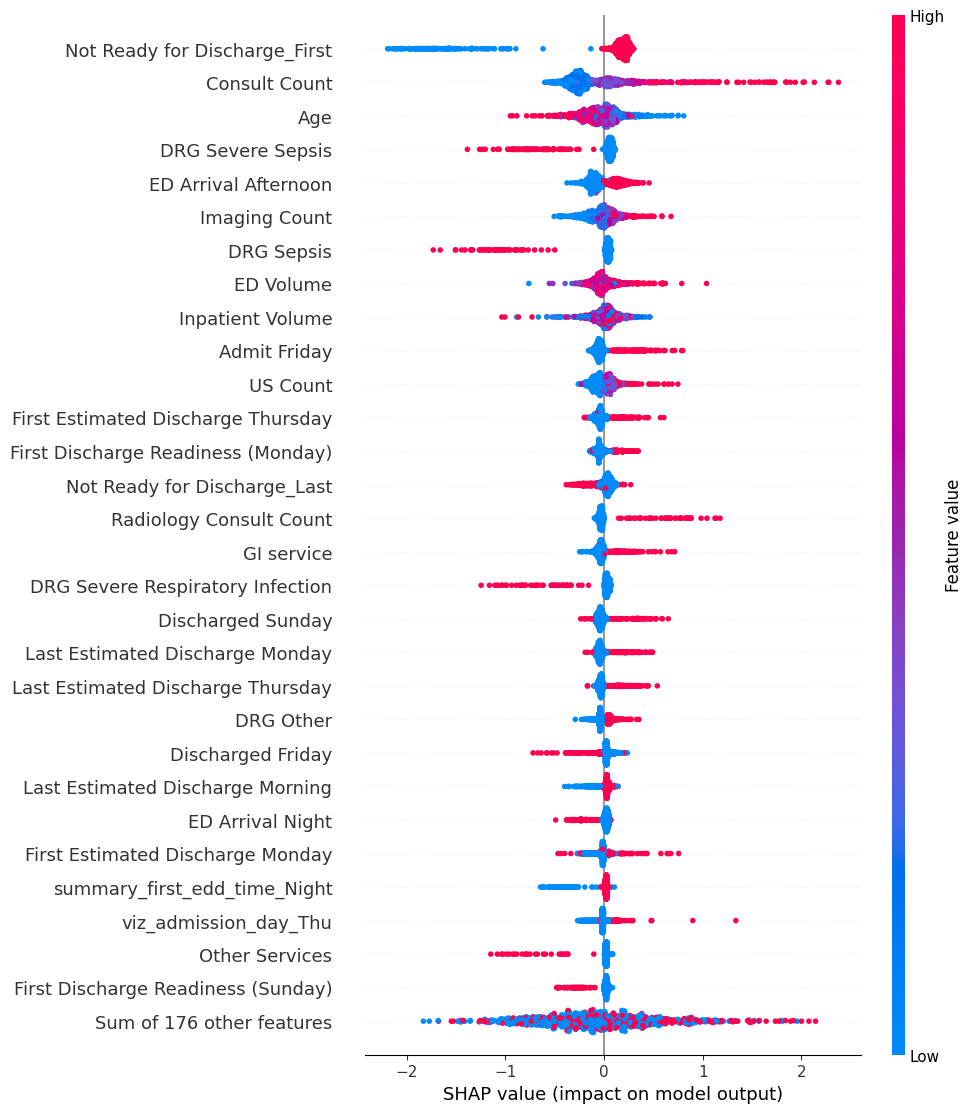

Plots for df_home_simple_2024-08-01 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_hf
df_filt shape: (1351, 907)
X train_preprocessed shape: (1091, 261)
X val preprocessed shape: (260, 261)
y train prolonged LOS proportion: 0.44912923923006415
y val prolonged LOS proportion: 0.4576923076923077
X_train_selected shape: (1091, 176)
X_val_selected shape: (260, 176)
100%|██████████| 20/20 [00:06<00:00,  3.09trial/s, best loss: -0.6860287007364929]
XGB Best parameters for 176 features: {'colsample_by_tree': 0.8099656297384077, 'learning_rate': 0.17383589279439982, 'max_depth': 7, 'n_estimators': 20, 'num_leaves': 8, 'reg_lambda': 0.48490437823738375}


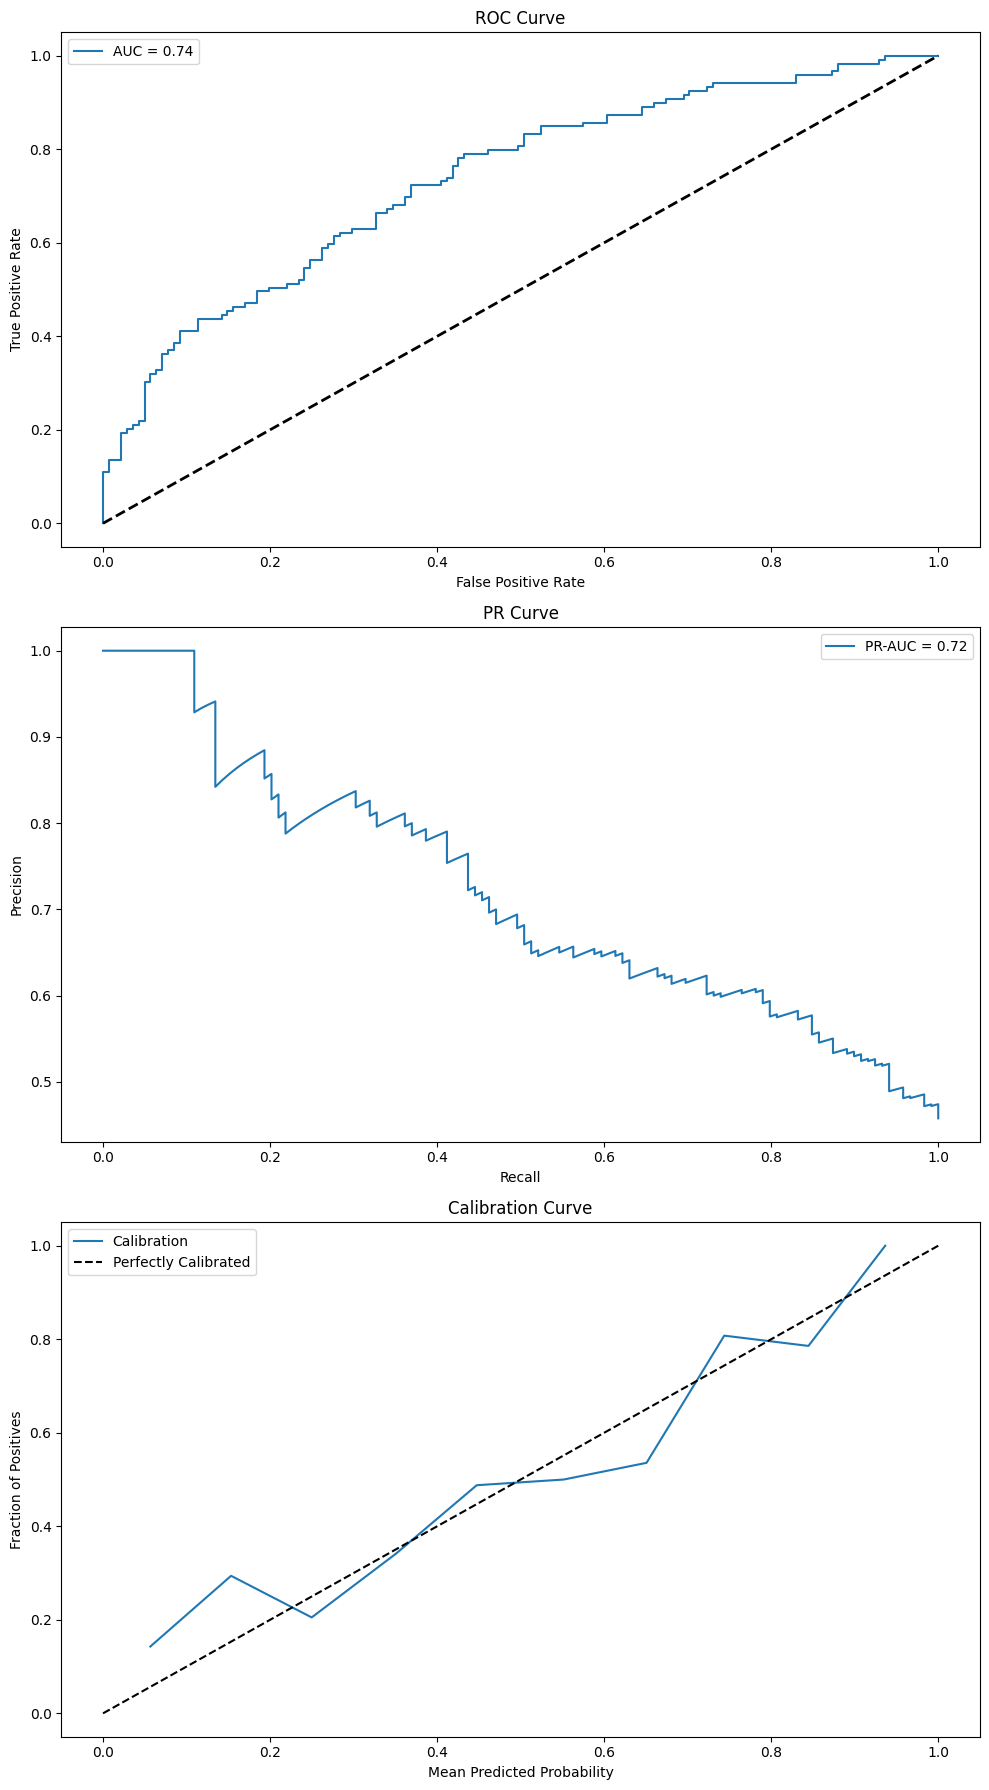

Specificity : 0.7305
Sensitivity : 0.5882
Accuracy : 0.6654
Precision : 0.6481
F1 score : 0.6167
Of 141 people who did not have a prolonged LOS, 103 (73.05%) were correctly classified.
Of 119 people who did have a prolonged LOS, 70 (58.82%) were correctly classified.
summary_first_rfd_status_No
summary_consult_count_all
img_count_any
con_signer_ym_provider_count
img_count_us
viz_age
viz_gender_Female
thro_ed_arrival_time_Afternoon
summary_first_rfd_status_Yes, no barriers
census_daily_inpt_count
summary_first_edd_day_Wed
summary_consult_count_unique_services
census_daily_ed_count
summary_first_rfd_day_Mon
thro_boarding_yn
viz_disp_collapsed_Home
con_max_consult_note_creation_day_Mon
thro_first_bed_assigned_time_Afternoon
summary_first_edd_day_Mon
summary_last_rfd_status_Yes, no barriers
thro_ed_arrival_time_Night
con_service_palliative_count
summary_last_edd_day_Fri
summary_last_edd_doc_day_Mon
thro_ed_arrival_day_Sun
viz_discharged_day_Sat
viz_admission_day_Mon
img_count_mr
con_max_co

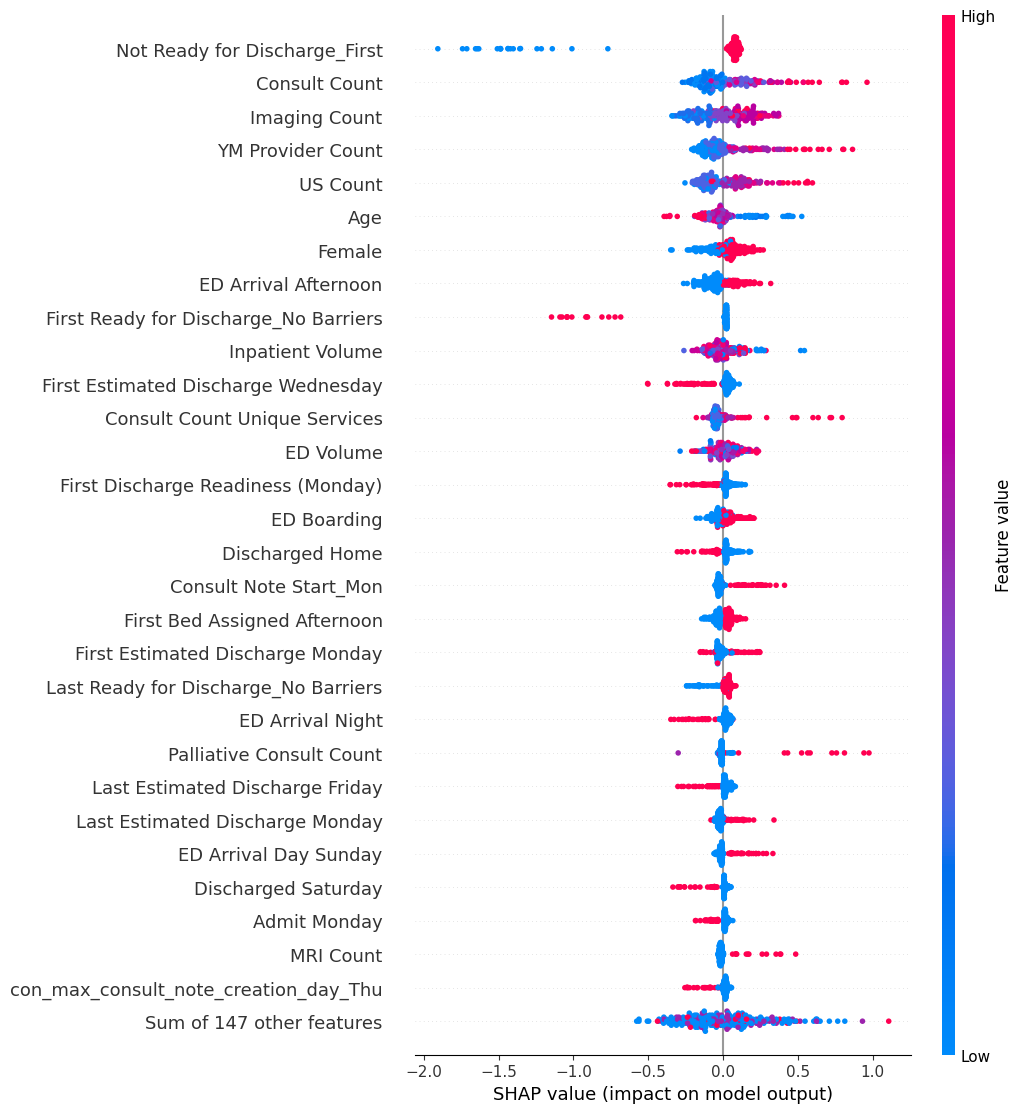

Plots for df_hf_simple_2024-08-01 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output


In [5]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_and_plot(df_filt, fp_simple, output_folder, df_name, suffix="simple")

### With Quintiles

Running on df_all
df_filt shape: (12771, 907)
X train_preprocessed shape: (10246, 1486)
X val preprocessed shape: (2525, 1486)
y train prolonged LOS proportion: 0.4388053874682803
y val prolonged LOS proportion: 0.4304950495049505
X_train_selected shape: (10246, 615)
X_val_selected shape: (2525, 615)
100%|██████████| 20/20 [00:34<00:00,  1.74s/trial, best loss: -0.7939250404905074]
XGB Best parameters for 615 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


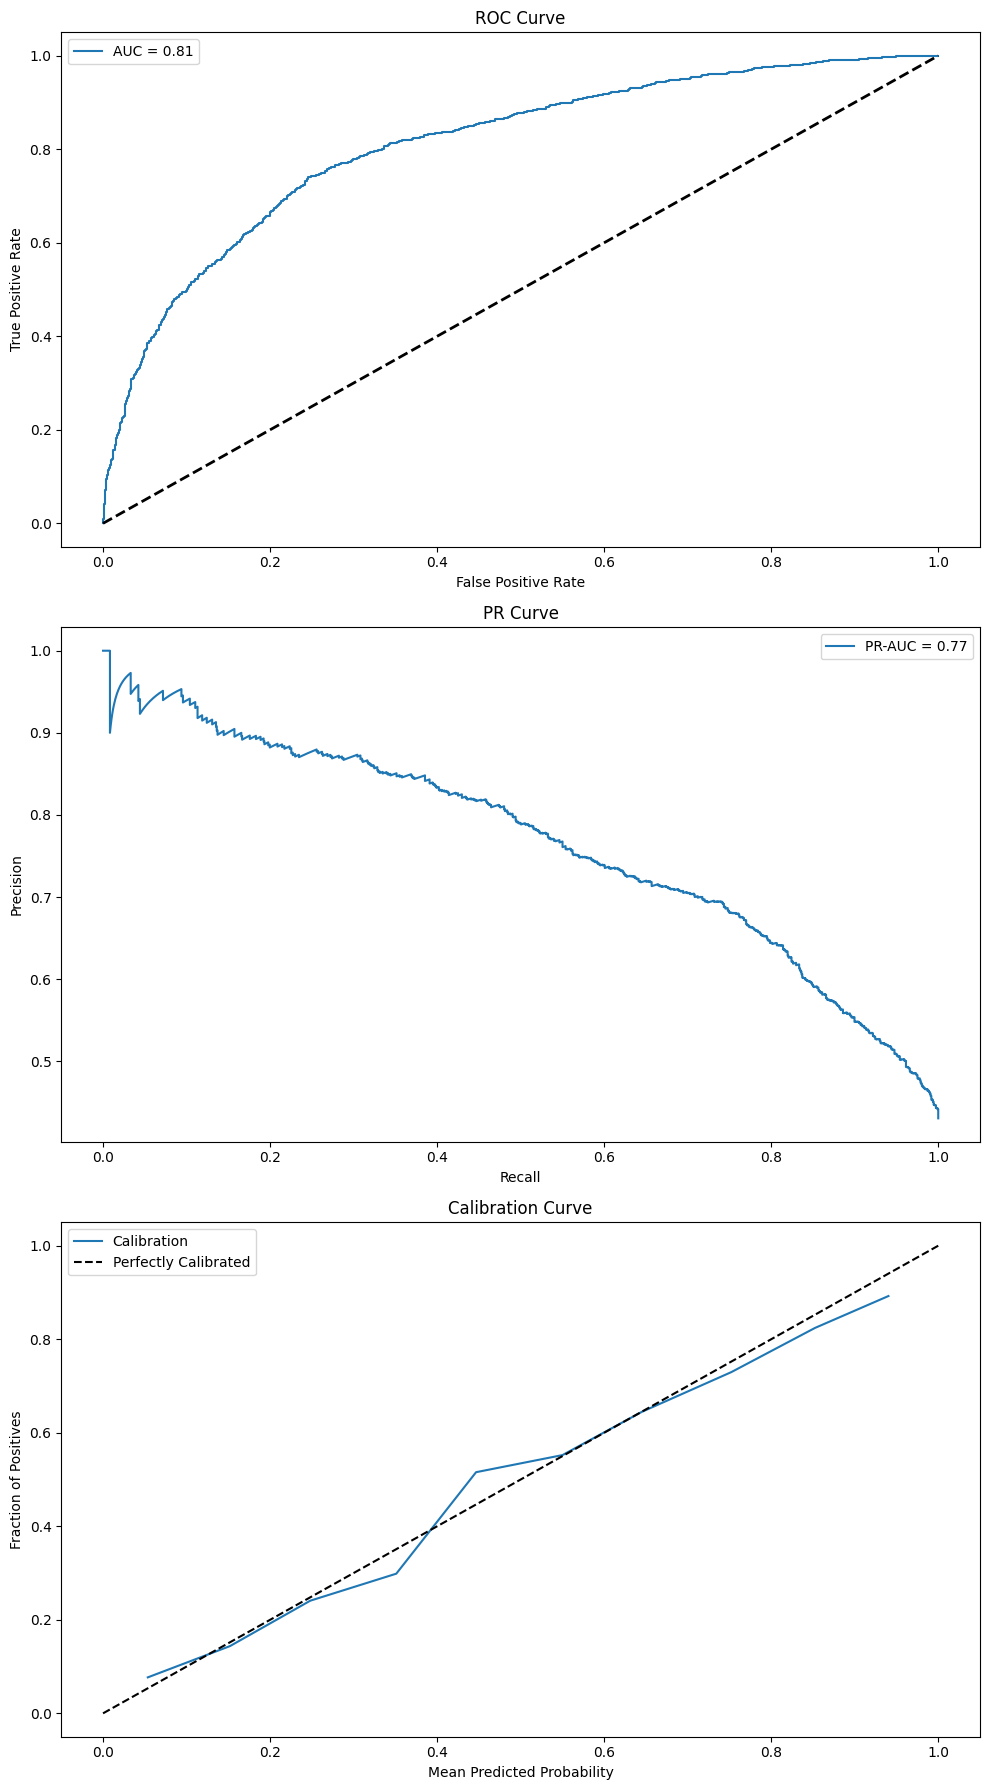

Specificity : 0.8331
Sensitivity : 0.6127
Accuracy : 0.7382
Precision : 0.7351
F1 score : 0.6683
Of 1438 people who did not have a prolonged LOS, 1198 (83.31%) were correctly classified.
Of 1087 people who did have a prolonged LOS, 666 (61.27%) were correctly classified.
img_max_admit_order_to_imaging_order_any_quintile_5.0
summary_first_rfd_status_No
summary_consult_count_all
con_max_admit_order_to_consult_order_any_quintile_5.0
viz_drg_Respiratory infections & inflammations w mcc
img_avg_admit_order_to_imaging_order_any_quintile_5.0
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
viz_service_collapsed_Surgical Services
con_avg_admit_order_to_consult_order_any_quintile_5.0
viz_age
thro_ed_arrival_time_Afternoon
viz_disp_collapsed_Home
img_max_admit_order_to_imaging_order_any_quintile_4.0
con_avg_admit_order_to_consult_completion_any_quintile_5.0
con_max_admit_order_to_consult_completion_any_quintile_4.0
census_daily_ed_count
summary_last_rfd_status_No
con_max_admit_order_to

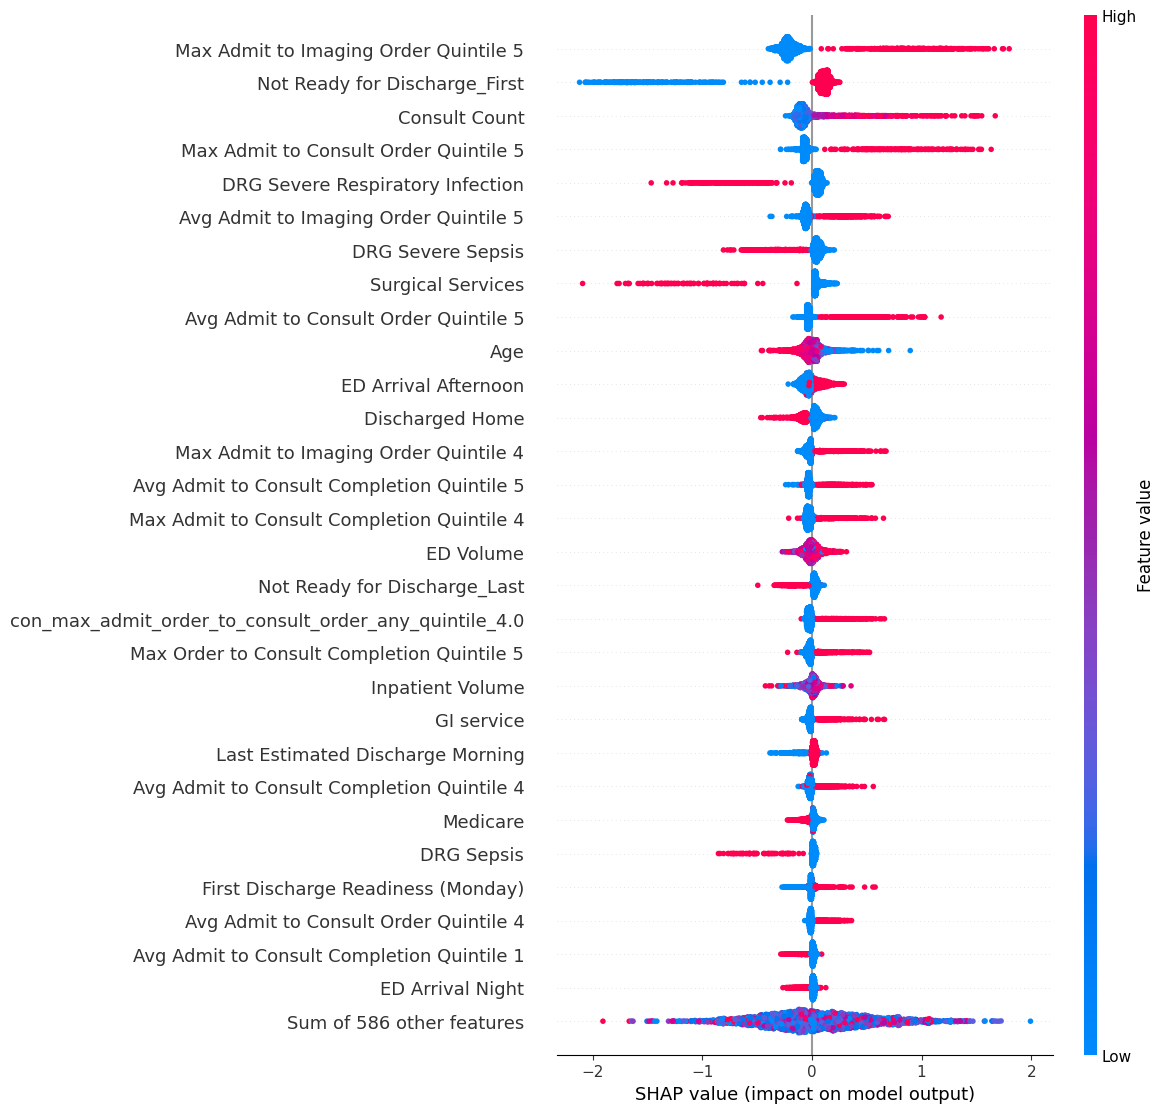

Plots for df_all_with_quintiles_2024-08-01 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_home
df_filt shape: (4749, 907)
X train_preprocessed shape: (3814, 1477)
X val preprocessed shape: (935, 1477)
y train prolonged LOS proportion: 0.3618248557944415
y val prolonged LOS proportion: 0.32192513368983955
X_train_selected shape: (3814, 524)
X_val_selected shape: (935, 524)
100%|██████████| 20/20 [00:19<00:00,  1.00trial/s, best loss: -0.805715462525453] 
XGB Best parameters for 524 features: {'colsample_by_tree': 0.6425936901635491, 'learning_rate': 0.13914887471932533, 'max_depth': 14, 'n_estimators': 29, 'num_leaves': 35, 'reg_lambda': 0.8474645439246081}


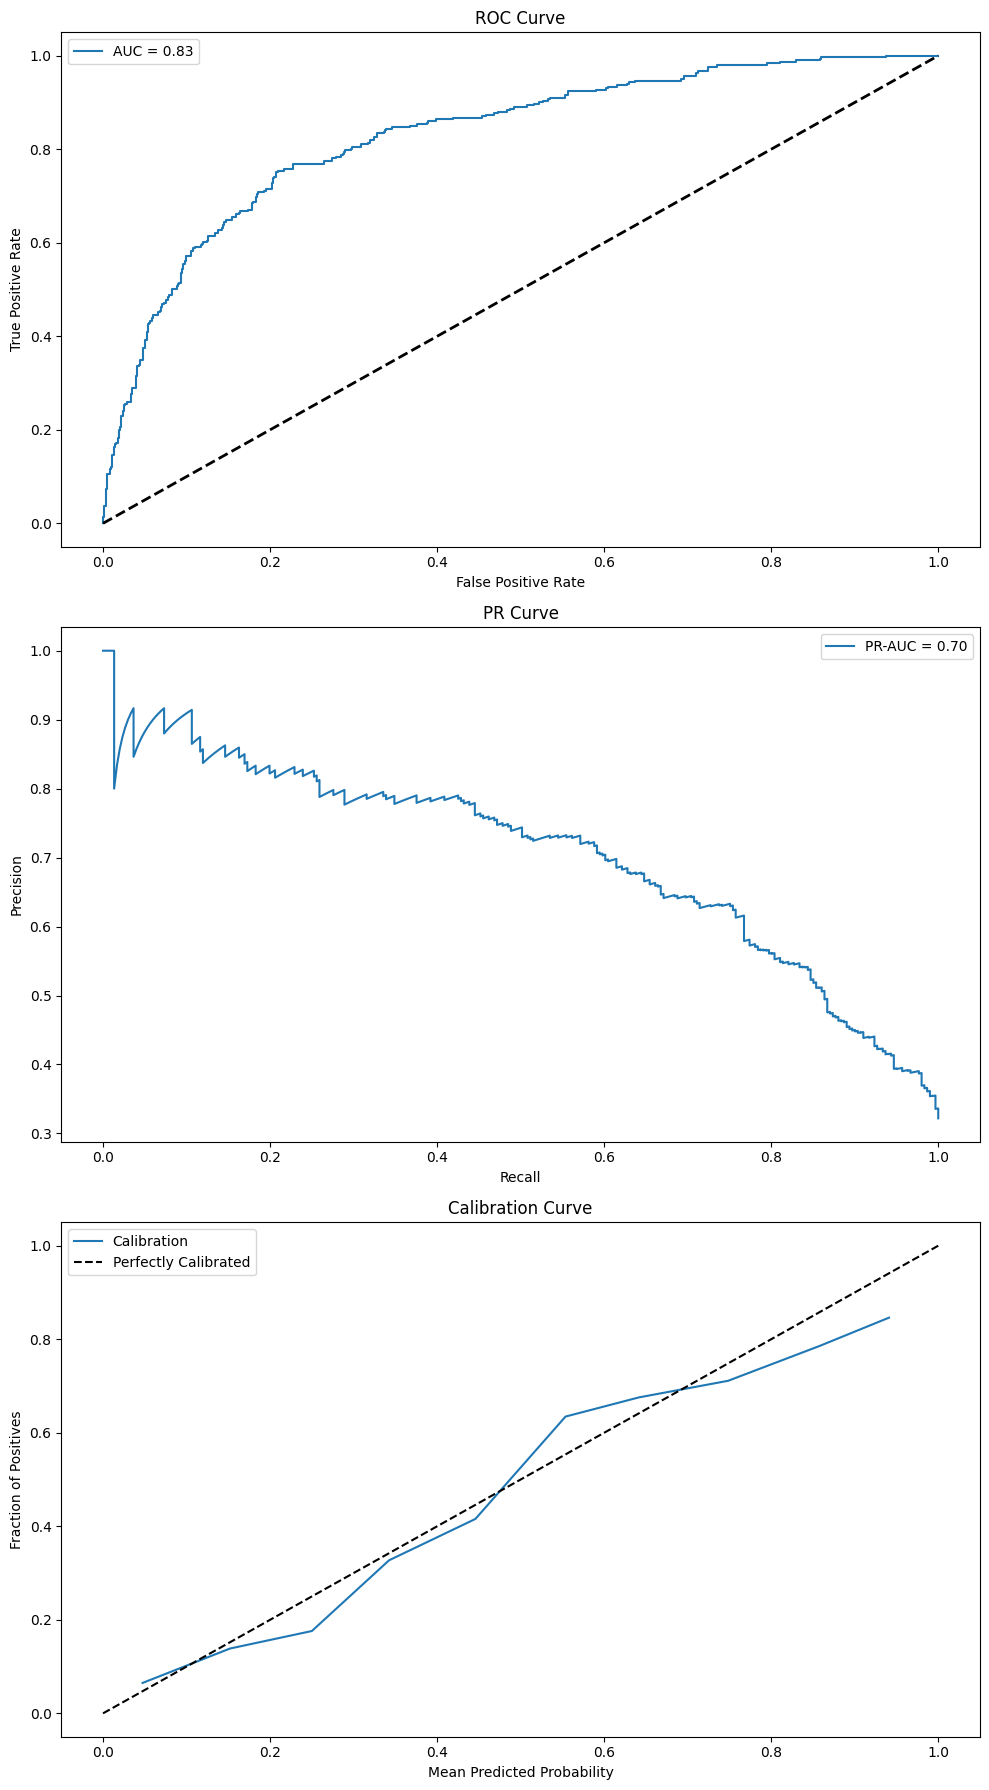

Specificity : 0.9038
Sensitivity : 0.5548
Accuracy : 0.7914
Precision : 0.7325
F1 score : 0.6314
Of 634 people who did not have a prolonged LOS, 573 (90.38%) were correctly classified.
Of 301 people who did have a prolonged LOS, 167 (55.48%) were correctly classified.
summary_first_rfd_status_No
img_max_admit_order_to_imaging_order_any_quintile_5.0
summary_consult_count_all
img_max_admit_order_to_imaging_order_any_quintile_4.0
viz_age
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w mcc
thro_ed_arrival_time_Afternoon
viz_drg_Septicemia or severe sepsis w/o mv >96 hours w/o mcc
viz_ynhhs_sg2_service_Digestive Health - Medical
viz_drg_Respiratory infections & inflammations w mcc
summary_first_edd_doc_day_Mon
census_daily_ed_count
summary_first_rfd_day_Mon
summary_last_edd_doc_day_Mon
thro_ed_arrival_time_Night
summary_last_rfd_status_No
census_daily_inpt_count
summary_last_rfd_day_Tue
summary_last_edd_doc_time_Morning
img_max_order_to_completion_any_quintile_5.0
con_max_admit_order

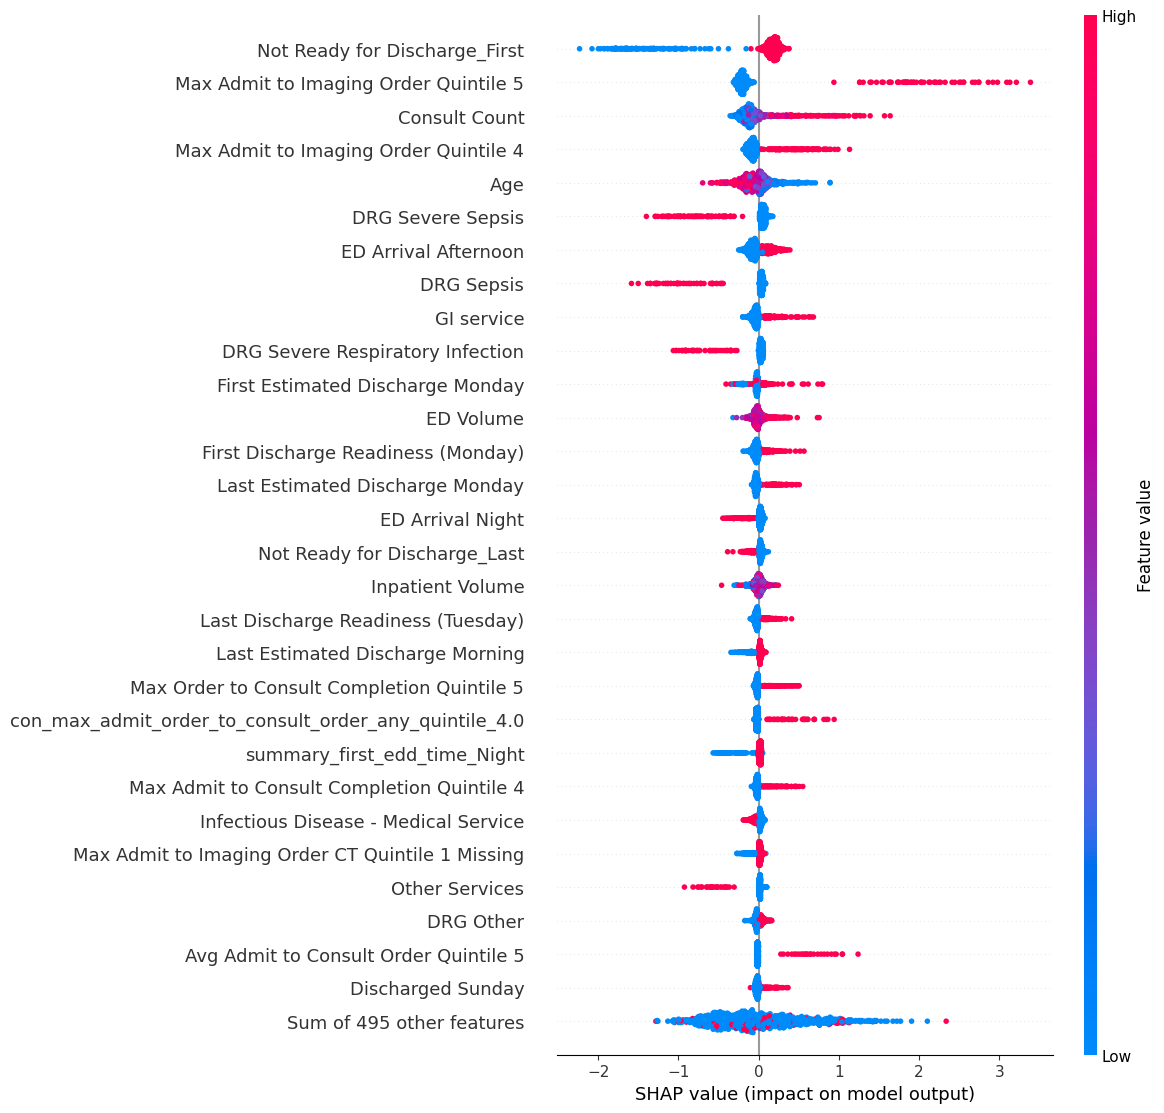

Plots for df_home_with_quintiles_2024-08-01 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output
Running on df_hf
df_filt shape: (1351, 907)
X train_preprocessed shape: (1091, 1517)
X val preprocessed shape: (260, 1517)
y train prolonged LOS proportion: 0.44912923923006415
y val prolonged LOS proportion: 0.4576923076923077
X_train_selected shape: (1091, 459)
X_val_selected shape: (260, 459)
100%|██████████| 20/20 [00:12<00:00,  1.57trial/s, best loss: -0.7458481615786811]
XGB Best parameters for 459 features: {'colsample_by_tree': 0.7348108827859361, 'learning_rate': 0.05593600654002751, 'max_depth': 7, 'n_estimators': 26, 'num_leaves': 17, 'reg_lambda': 0.4421542674710245}


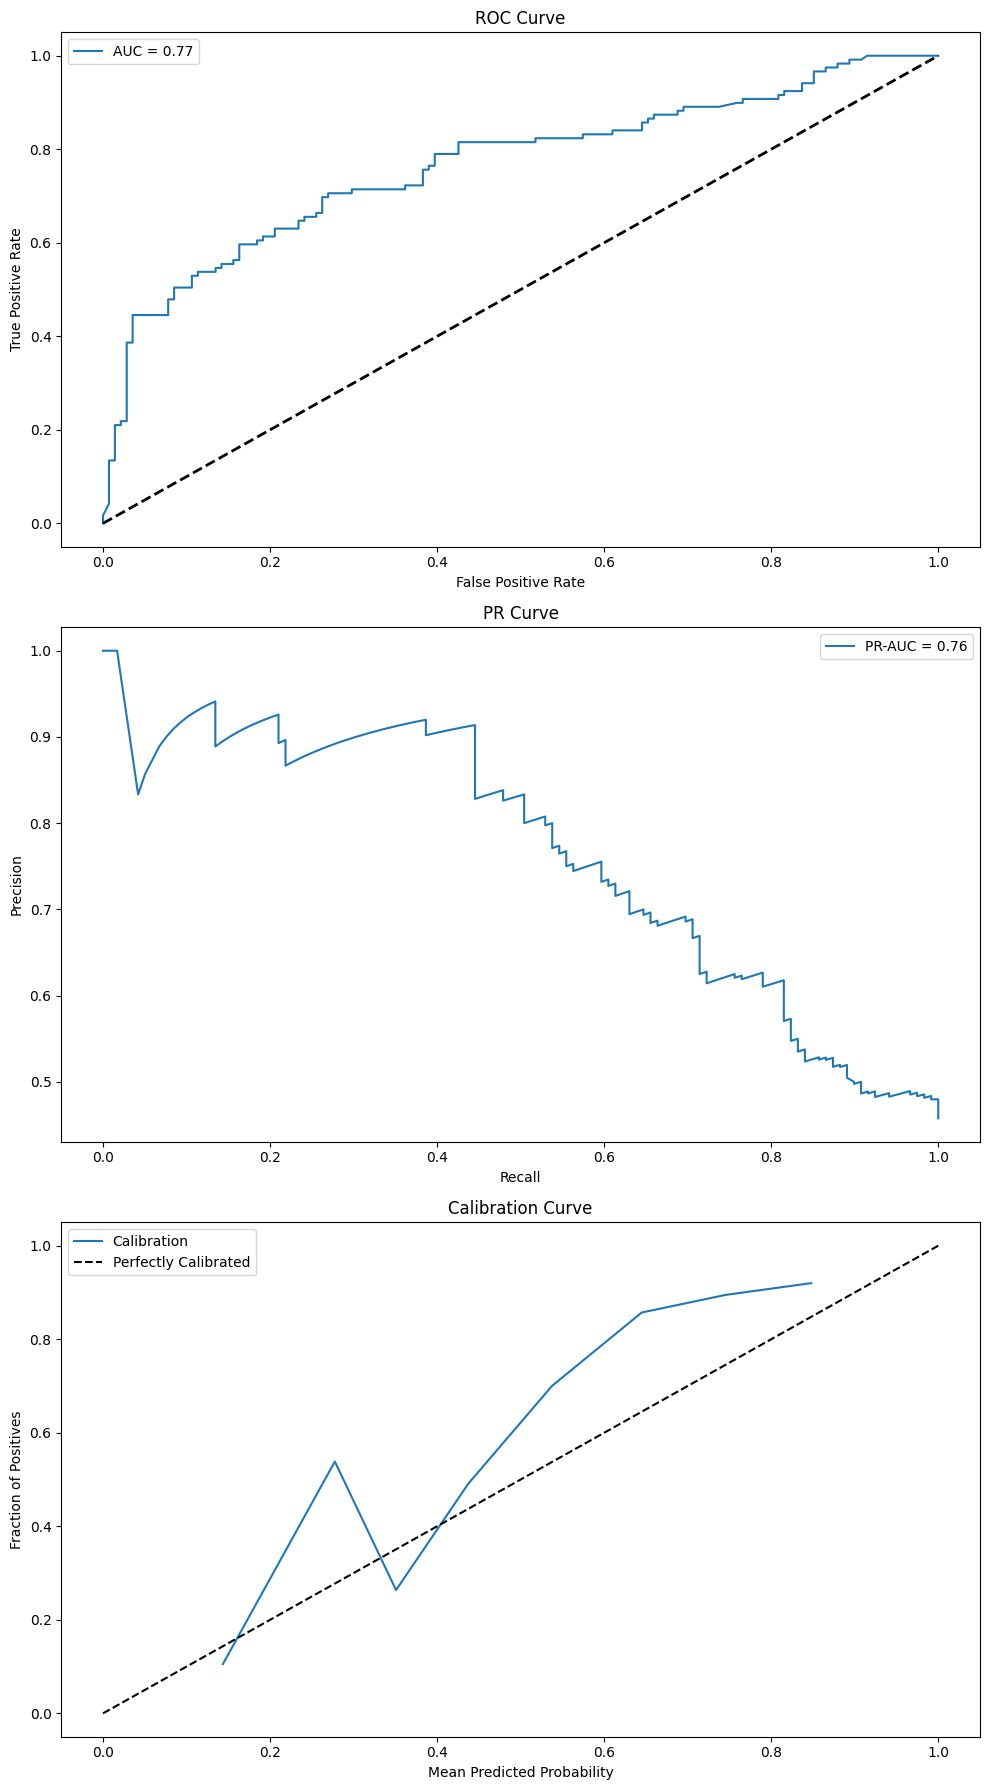

Specificity : 0.9433
Sensitivity : 0.4454
Accuracy : 0.7154
Precision : 0.8689
F1 score : 0.5889
Of 141 people who did not have a prolonged LOS, 133 (94.33%) were correctly classified.
Of 119 people who did have a prolonged LOS, 53 (44.54%) were correctly classified.
img_max_admit_order_to_imaging_order_any_quintile_5.0
con_avg_admit_order_to_consult_order_any_quintile_5.0
summary_first_rfd_status_No
con_avg_admit_order_to_consult_order_any_quintile_4.0
thro_ed_arrival_time_Afternoon
viz_age
img_avg_admit_order_to_imaging_order_any_quintile_5.0
img_max_order_to_completion_any_quintile_5.0
viz_discharged_day_Tue
con_avg_admit_order_to_consult_completion_cardiology_quintile_1.0
summary_first_rfd_status_Yes, no barriers
census_daily_ed_count
summary_consult_count_all
summary_last_rfd_status_No
con_signer_ym_provider_count
summary_first_edd_day_Wed
con_max_consult_order_to_sign_cardiology_quintile_2.0
img_count_any
con_service_palliative_count
summary_first_rfd_day_Mon
img_max_admit_order_

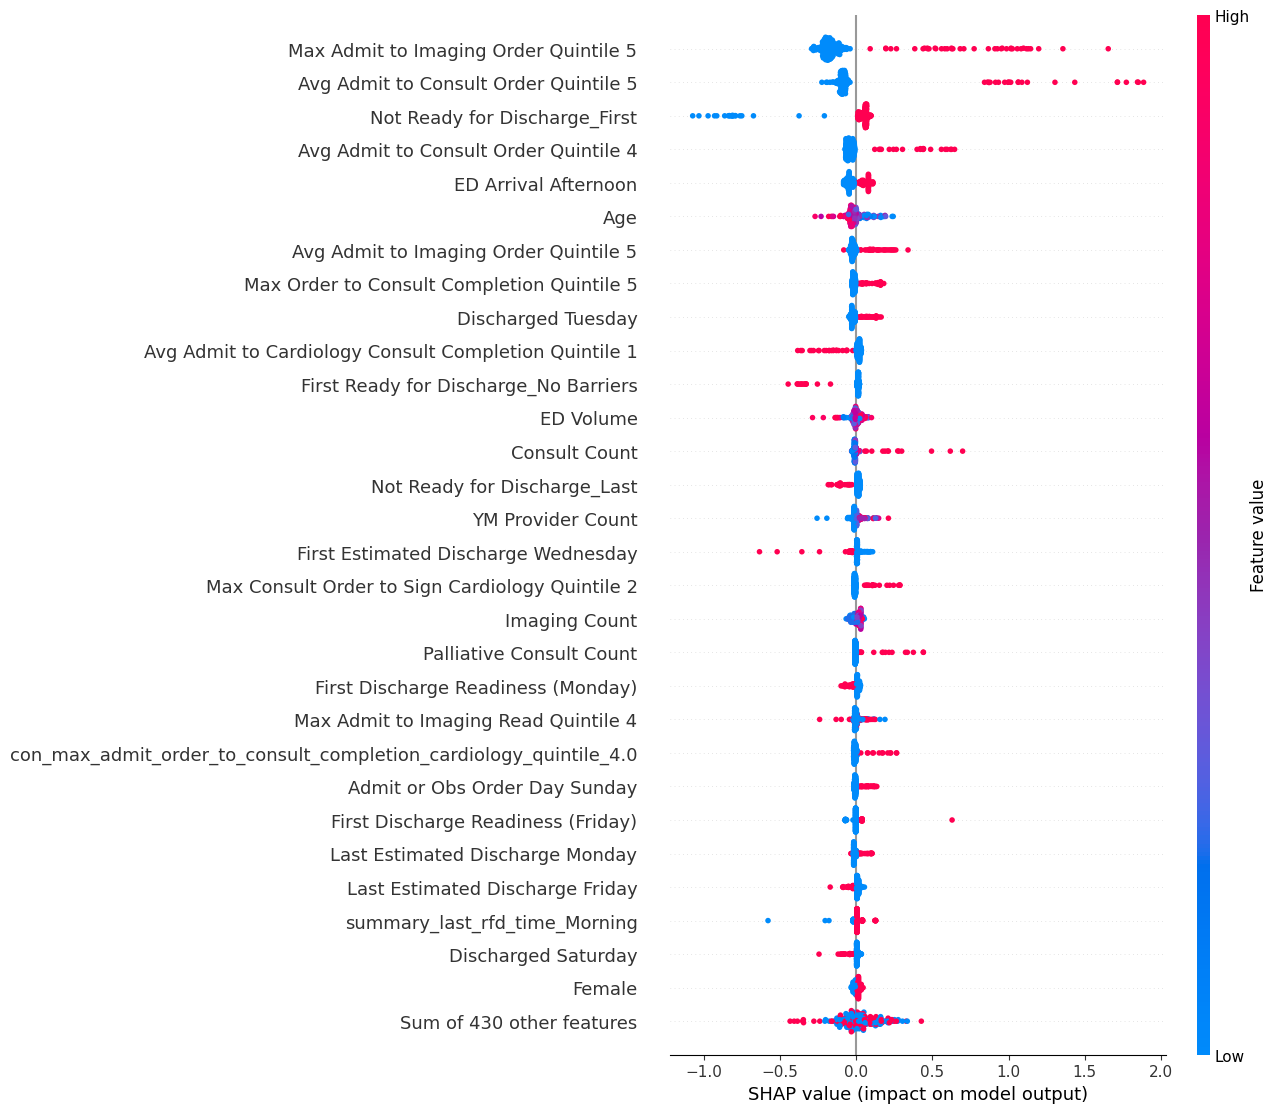

Plots for df_hf_with_quintiles_2024-08-01 saved to /gpfs/milgram/project/rtaylor/imc33/LOS/output


In [6]:
# Run the function for each data frame and save the plots
for df_name, df_filt in dfs.items():
    print(f"Running on {df_name}")
    run_xgb_and_plot(df_filt, fp_complex, output_folder, df_name, suffix="with_quintiles")